In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, accuracy_score ,mean_squared_error
from collections import Counter
import re
import nltk

import pymorphy2

#import gensim

In [2]:

data=pd.read_csv("irt.csv")


In [3]:
data

,Unnamed: 0,lemmatized_review,type
0,0,это мой мнение и я без разница сколько быть ми...,1
1,1,"вполне неплохой шоу , выгодно отличаться от бо...",1
2,2,"уж кто-кто , а российский специалист 'умеют ' ...",0
3,4,"есть такой категория фильм , который построить...",1
4,5,"из весь фильм про зомби просмотреных я , « дне...",1
...,...,...,...
128287,131664,"прийти из кинотеатр , необходимо быть перевари...",1
128288,131665,молодой парень адонис джонсон вырасти в приёмн...,0
128289,131666,на двор 21 век . мировой кинематограф заразить...,-1
128290,131667,"ну и ничего , что 70 % время уделить молодой м...",1


In [4]:
def tokenize(text):
    text = text.lower().replace('ё', 'е')
    return re.findall("[а-яё]+", text)

reviews=data["lemmatized_review"].values


list_of_words=[tokenize(review) for review in reviews ]
for i in range(len(list_of_words)):
    list_of_words[i].append(data['type'][i])
list_of_words[0]

['это',
 'мой',
 'мнение',
 'и',
 'я',
 'без',
 'разница',
 'сколько',
 'быть',
 'минус',
 'я',
 'мочь',
 'сказать',
 'только',
 'один',
 'вкратце',
 'фассбендер',
 'как',
 'холл',
 'увы',
 'не',
 'то',
 'пальто',
 'на',
 'уровень',
 'как',
 'и',
 'джессика',
 'альба',
 'из',
 'город',
 'грех',
 'часть',
 'книжный',
 'холл',
 'иметь',
 'более',
 'глубокий',
 'характер',
 'и',
 'прилично',
 'скелет',
 'в',
 'шкаф',
 'в',
 'отличие',
 'от',
 'экранизировать',
 'снеговик',
 'видно',
 'получиться',
 'обрезать',
 'и',
 'недоделать',
 'но',
 'все',
 'таки',
 'за',
 'смелый',
 'попытка',
 'так',
 'экранизировать',
 'не',
 'сам',
 'хороший',
 'режиссер',
 'респект',
 'однозначно',
 'как',
 'всегда',
 'продюсер',
 'и',
 'студийный',
 'босс',
 'напарашили',
 'а',
 'мочь',
 'бы',
 'получиться',
 'один',
 'из',
 'потрясать',
 'и',
 'атмосферный',
 'детективный',
 'драма',
 'последний',
 'год',
 'но',
 'увы',
 'не',
 'судьба',
 'у',
 'книга',
 'как',
 'и',
 'у',
 'фильм',
 'сюжет',
 'очень',
 'прос

In [5]:
data["type"].value_counts()

 1    84782
 0    24161
-1    19349
Name: type, dtype: int64

<AxesSubplot:>

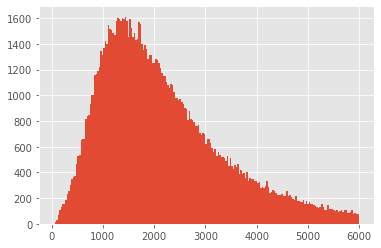

In [6]:
data.lemmatized_review.str.len().hist(bins=200)

Отличаются ли рецензии разной тональности длиной?

<AxesSubplot:>

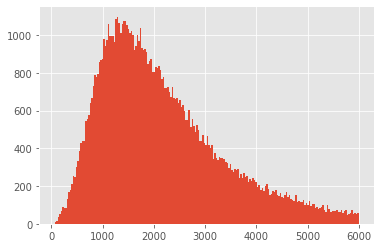

In [7]:
pos_data=data[data["type"]==1]
pos_data.lemmatized_review.str.len().hist(bins=200)

<AxesSubplot:>

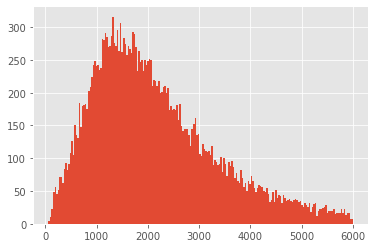

In [8]:
neu_data=data[data["type"]==0]
neu_data.lemmatized_review.str.len().hist(bins=200)

<AxesSubplot:>

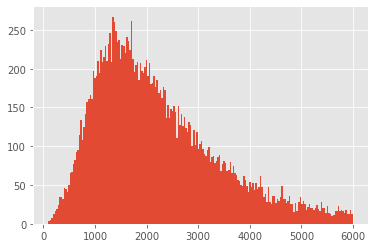

In [9]:
neg_data=data[data["type"]==-1]
neg_data.lemmatized_review.str.len().hist(bins=200)

Посмотрим на самые частые слова/сочетания слов.

In [10]:
list_of_words[0][:-1]

['это',
 'мой',
 'мнение',
 'и',
 'я',
 'без',
 'разница',
 'сколько',
 'быть',
 'минус',
 'я',
 'мочь',
 'сказать',
 'только',
 'один',
 'вкратце',
 'фассбендер',
 'как',
 'холл',
 'увы',
 'не',
 'то',
 'пальто',
 'на',
 'уровень',
 'как',
 'и',
 'джессика',
 'альба',
 'из',
 'город',
 'грех',
 'часть',
 'книжный',
 'холл',
 'иметь',
 'более',
 'глубокий',
 'характер',
 'и',
 'прилично',
 'скелет',
 'в',
 'шкаф',
 'в',
 'отличие',
 'от',
 'экранизировать',
 'снеговик',
 'видно',
 'получиться',
 'обрезать',
 'и',
 'недоделать',
 'но',
 'все',
 'таки',
 'за',
 'смелый',
 'попытка',
 'так',
 'экранизировать',
 'не',
 'сам',
 'хороший',
 'режиссер',
 'респект',
 'однозначно',
 'как',
 'всегда',
 'продюсер',
 'и',
 'студийный',
 'босс',
 'напарашили',
 'а',
 'мочь',
 'бы',
 'получиться',
 'один',
 'из',
 'потрясать',
 'и',
 'атмосферный',
 'детективный',
 'драма',
 'последний',
 'год',
 'но',
 'увы',
 'не',
 'судьба',
 'у',
 'книга',
 'как',
 'и',
 'у',
 'фильм',
 'сюжет',
 'очень',
 'прос

In [11]:
reviews=list_of_words
#occurence = Counter()
occurence = {}
for review in reviews:
    for token in review[:-1]:
        if token in occurence:
            if review[-1] == -1:
                occurence[token][0][0] += 1
            if review[-1] == 0:
                occurence[token][0][1] += 1
            if review[-1] == 1:
                occurence[token][0][2] += 1
            occurence[token][1].add(review[-1])
        else:
            occurence[token] = list([[0, 0, 0], set()])

In [12]:
bad_tokens = []
for k in occurence:
    if occurence[k][0][0] > 20000 and occurence[k][0][1] > 20000 and occurence[k][0][2] > 20000 and len(occurence[k][1]) == 3:
        bad_tokens.append(k)

In [13]:
len(bad_tokens)

35

In [14]:
bad_tokens

['это',
 'и',
 'я',
 'быть',
 'один',
 'как',
 'не',
 'то',
 'на',
 'из',
 'в',
 'от',
 'но',
 'все',
 'за',
 'так',
 'а',
 'бы',
 'у',
 'фильм',
 'свой',
 'он',
 'что',
 'она',
 'же',
 'к',
 'они',
 'тот',
 'который',
 'с',
 'этот',
 'такой',
 'по',
 'весь',
 'о']

собсна сама модель

In [15]:
#stop_words = set(nltk.corpus.stopwords.words('russian'))
#bad_tokens=set(bad_tokens)
#stopword_set = bad_tokens.union(stop_words)

SEED=43
#len(stopword_set)

In [16]:
pipe = Pipeline([
    (
        'vectorizer',
        TfidfVectorizer(
            lowercase=True, ngram_range=(1,3), analyzer='word', token_pattern="[а-яё]+",norm='l2',
            stop_words=bad_tokens, min_df=8, max_df=0.8
        )
    ),
    ('clf', SGDClassifier(random_state=SEED, loss='modified_huber', class_weight='balanced'))
])
#так вроде лучший результат

In [17]:
x=data["lemmatized_review"].values
y=data["type"].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [19]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, min_df=8, ngram_range=(1, 3),
                                 stop_words=['это', 'и', 'я', 'быть', 'один',
                                             'как', 'не', 'то', 'на', 'из', 'в',
                                             'от', 'но', 'все', 'за', 'так',
                                             'а', 'бы', 'у', 'фильм', 'свой',
                                             'он', 'что', 'она', 'же', 'к',
                                             'они', 'тот', 'который', 'с', ...],
                                 token_pattern='[а-яё]+')),
                ('clf',
                 SGDClassifier(class_weight='balanced', loss='modified_huber',
                               random_state=43))])

In [20]:
test_predictions = pipe.predict(x_test)

In [122]:
vect=TfidfVectorizer(lowercase=True, ngram_range=(1,1), token_pattern="[а-яё]+",norm='l2',
                     stop_words=bad_tokens, min_df=10, max_df=0.8
        )

X_vect=vect.fit_transform(x_train)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
model = LogisticRegression(C=100,max_iter=1000000,multi_class='multinomial',)

In [ ]:
model.fit(X_vect, y_train)

In [ ]:
X_vect_test=vect.transform(x_test)

In [ ]:
yy=model.predict(X_vect_test)

In [ ]:
yy

In [ ]:
balanced_accuracy_score(yy,y_test)

### Посмотрим на confusion_matrix

In [21]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_true=y_test, y_pred=test_predictions)
m

array([[ 2923,   465,   456],
       [ 1048,  1517,  2244],
       [  480,   990, 15536]], dtype=int64)

### Специальная метрика

In [22]:
def special_metric(y_test,test_predictions):
    mse=mean_squared_error(y_test,test_predictions)
    return 1-0.25*mse
    

In [23]:
special_metric(y_test, test_predictions)

0.9172707432090105

### balanced_accuracy_score

In [24]:
balanced_accuracy_score(test_predictions,y_test)

0.6730260865689993

### accuracy_score

In [25]:
accuracy_score(y_test, test_predictions)

0.7785182587006508

# Мера от Господинова

In [26]:
a1=m[0][0]
a2=m[0][1]
a3=m[0][2]
b1=m[1][0]
b2=m[1][1]
b3=m[1][2]
c1=m[2][0]
c2=m[2][1]
c3=m[2][2]

In [27]:
(a1+b2+c3)/(a1+b2+c3+a2+b1+b3+c2+2*c1+2*a3)

0.751118631321677

In [28]:
def our_precision(m):
    a1, a2, a3, b1, b2, b3, c1, c2, c3 = m[0][0], m[0][1], m[0][2], m[1][0], m[1][1], m[1][2], m[2][0], m[2][1], m[2][2]
    error = 0
    return [c3/(c3+a3+b3), b2/(a2+c2+b2), a1/(a1+b1+c1)]

In [29]:
print("Precision для положительных отзывов: ", our_precision(m)[0])
print("Precision для нейтральных отзывов: ", our_precision(m)[1])
print("Precision для отрицательных отзывов: ", our_precision(m)[2])


Precision для положительных отзывов:  0.8519412151787673
Precision для нейтральных отзывов:  0.5104306864064603
Precision для отрицательных отзывов:  0.6567063581217704


In [30]:
def our_recall(m):
    a1, a2, a3, b1, b2, b3, c1, c2, c3 = m[0][0], m[0][1], m[0][2], m[1][0], m[1][1], m[1][2], m[2][0], m[2][1], m[2][2]
    error = 0
    return [c3/(c3+c2+c1), b2/(b1+b2+b3),a1/(a1+a2+a3)]


In [31]:
 
print("Recall для положительных отзывов: ", our_recall(m)[0])
print("Recall для нейтральных отзывов: ", our_recall(m)[1])
print("Recall для отрицательных отзывов: ", our_recall(m)[2])

Recall для положительных отзывов:  0.9135599200282253
Recall для нейтральных отзывов:  0.3154501975462674
Recall для отрицательных отзывов:  0.7604058272632674


In [33]:
def our_f1(pr,rec):
    return 2*pr*rec/(pr+rec)

In [34]:
print("F1-score для положительных отзывов: ", our_f1(our_precision(m)[0],our_recall(m)[0]))
print("F1-score для нейтральных отзывов: ", our_f1(our_precision(m)[1],our_recall(m)[1]))
print("F1-score для отрицательных отзывов: ", our_f1(our_precision(m)[2],our_recall(m)[2]))

F1-score для положительных отзывов:  0.881675273821009
F1-score для нейтральных отзывов:  0.3899241742706593
F1-score для отрицательных отзывов:  0.7047619047619047


In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMRegressor, LGBMClassifier

ModuleNotFoundError: No module named 'lightgbm'

In [8]:
pipe = Pipeline([
    (
        'vectorizer',
        TfidfVectorizer(
            lowercase=True, ngram_range=(1,3), analyzer='word', token_pattern="[а-яё]+",norm='l2',
            stop_words=bad_tokens, min_df=10, max_df=0.8
        )
    ),
    ('clf', LGBMClassifier(random_state=SEED, loss='modified_huber'))
])
#так вроде лучший результат

In [9]:
x=data["lemmatized_review"].values
y=data["type"].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [11]:
pipe.fit(x_train, y_train)

[LightGBM] [Warning] Unknown parameter: loss


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, min_df=10, ngram_range=(1, 3),
                                 stop_words={'а', 'бы', 'быть', 'в', 'весь',
                                             'всё', 'же', 'за', 'и', 'из', 'к',
                                             'как', 'который', 'на', 'не', 'но',
                                             'о', 'один', 'он', 'она', 'они',
                                             'от', 'по', 'с', 'свой', 'так',
                                             'такой', 'то', 'тот', 'у', ...},
                                 token_pattern='[а-яё]+')),
                ('clf',
                 LGBMClassifier(loss='modified_huber', random_state=43))])

In [12]:
test_predictions = pipe.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_true=y_test, y_pred=test_predictions)
m

array([[ 2184,   386,  1274],
       [  626,   936,  3247],
       [  269,   415, 16322]], dtype=int64)

In [14]:
a1=m[0][0]
a2=m[0][1]
a3=m[0][2]
b1=m[1][0]
b2=m[1][1]
b3=m[1][2]
c1=m[2][0]
c2=m[2][1]
c3=m[2][2]

In [15]:
(a1+b2+c3)/(a1+b2+c3+a2+b1+b3+c2+2*c1+2*a3)

0.7147268583192412

In [16]:
def our_precision(m):
    a1, a2, a3, b1, b2, b3, c1, c2, c3 = m[0][0], m[0][1], m[0][2], m[1][0], m[1][1], m[1][2], m[2][0], m[2][1], m[2][2]
    error = 0
    return [c3/(c3+a3+b3), b2/(a2+c2+b2), a1/(a1+b1+c1)]

In [17]:
print("Precision для положительных отзывов: ", our_precision(m)[0])
print("Precision для нейтральных отзывов: ", our_precision(m)[1])
print("Precision для отрицательных отзывов: ", our_precision(m)[2])

Precision для положительных отзывов:  0.7830926450127141
Precision для нейтральных отзывов:  0.538860103626943
Precision для отрицательных отзывов:  0.7093212081844755


In [18]:
def our_recall(m):
    a1, a2, a3, b1, b2, b3, c1, c2, c3 = m[0][0], m[0][1], m[0][2], m[1][0], m[1][1], m[1][2], m[2][0], m[2][1], m[2][2]
    error = 0
    return [c3/(c3+c2+c1), b2/(b1+b2+b3),a1/(a1+a2+a3)]

In [19]:
 
print("Recall для положительных отзывов: ", our_recall(m)[0])
print("Recall для нейтральных отзывов: ", our_recall(m)[1])
print("Recall для отрицательных отзывов: ", our_recall(m)[2])

Recall для положительных отзывов:  0.9597789015641538
Recall для нейтральных отзывов:  0.19463505926388022
Recall для отрицательных отзывов:  0.5681581685744017
